In [1]:
library("fmsb")

pokemon<-read.csv("../data/pokemon.csv",sep=",",stringsAsFactors=F, header = TRUE)
combats<-read.csv("../data/combats.csv",sep=",",stringsAsFactors=F, header = TRUE)
pokemon$Legendary <- as.numeric(as.logical(pokemon$Legendary)) + 1
#OBJ : Prédire la victoire d'un pokemon
#OB2 : Former une équipe optimale (min des chances de défaites) + Prédire la victoire d'une équipe de 6


Warning message:
"package 'fmsb' was built under R version 3.4.4"

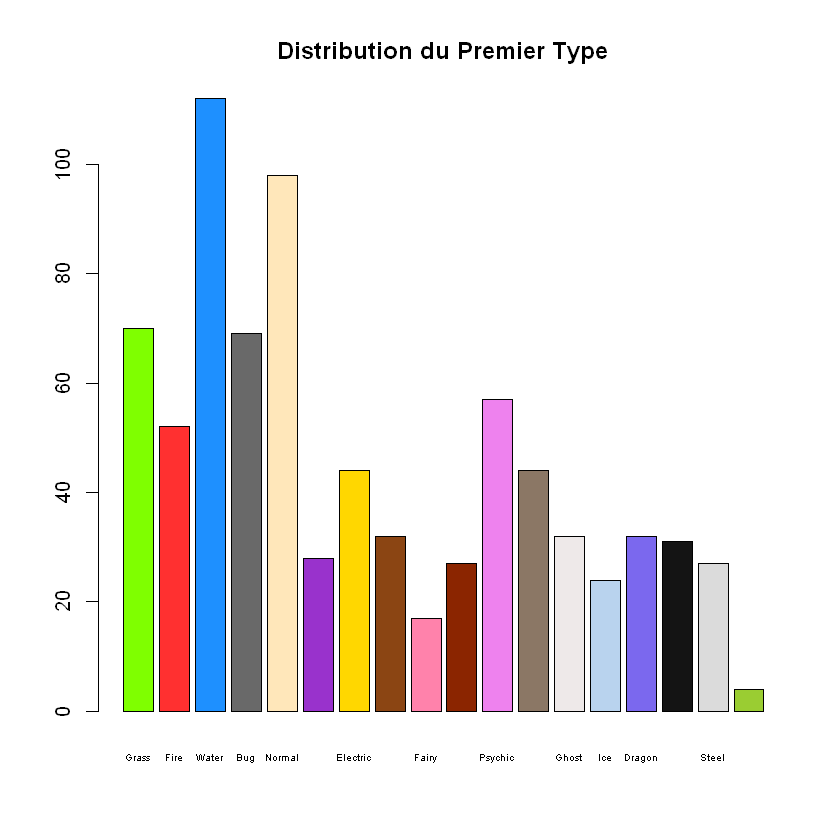

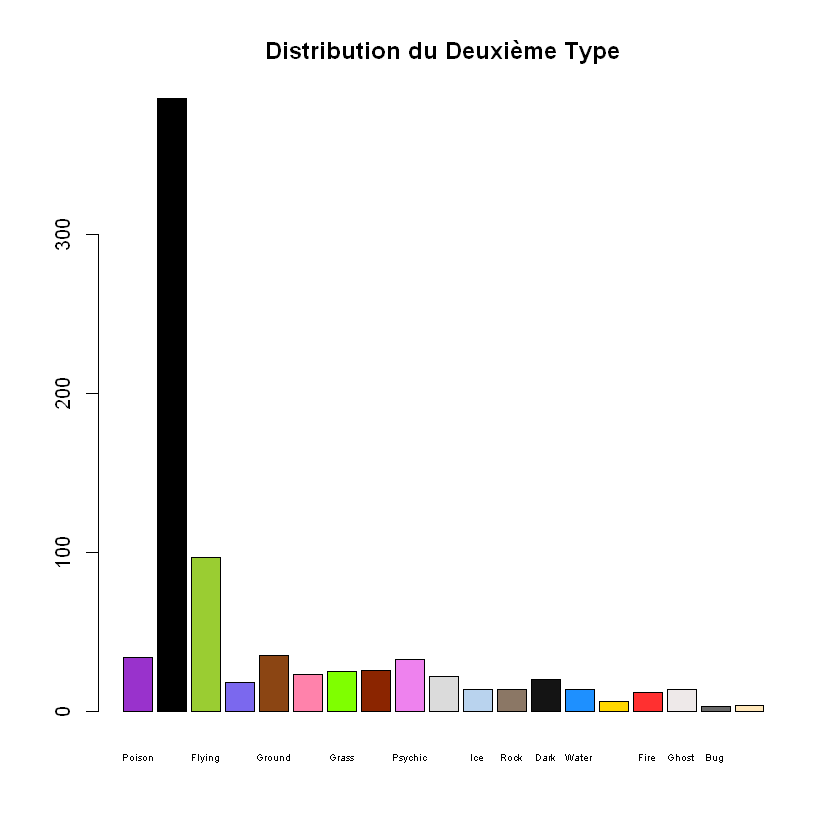

In [2]:
#Distribution du type de pokemon
Type <-as.factor(unique(pokemon$Type.1))
Color_type <-c("chartreuse","firebrick1","dodgerblue","dimgray","wheat1","darkorchid","gold","saddlebrown","palevioletred1","orangered4","violet","peachpuff4","snow2","slategray2","mediumslateblue","gray8","gray86","yellowgreen")
Effectif_type<-matrix(1,1)
for (i in 1:18)
{
  Effectif_type[i]<-length(pokemon$X.[pokemon$Type.1==Type[i]])
  
}
barplot(Effectif_type,names.arg =Type, col=Color_type,cex.names=0.5,main ="Distribution du Premier Type")

pokemon$Type.2[pokemon$Type.2==""]<-"Rien"
Type2 <-as.factor(unique(pokemon$Type.2))
Color_type <- c("darkorchid","black","yellowgreen","mediumslateblue","saddlebrown","palevioletred1","chartreuse","orangered4","violet","gray86","slategray2","peachpuff4","gray8","dodgerblue","gold","firebrick1","snow2","dimgray","wheat1")
Effectif_type<-matrix(1,1)
for (i in 1:19)
{
  Effectif_type[i]<-length(pokemon$X.[pokemon$Type.2==Type2[i]])
  
}
barplot(Effectif_type,names.arg =Type2, col=Color_type,cex.names=0.5,main ="Distribution du Deuxième Type")





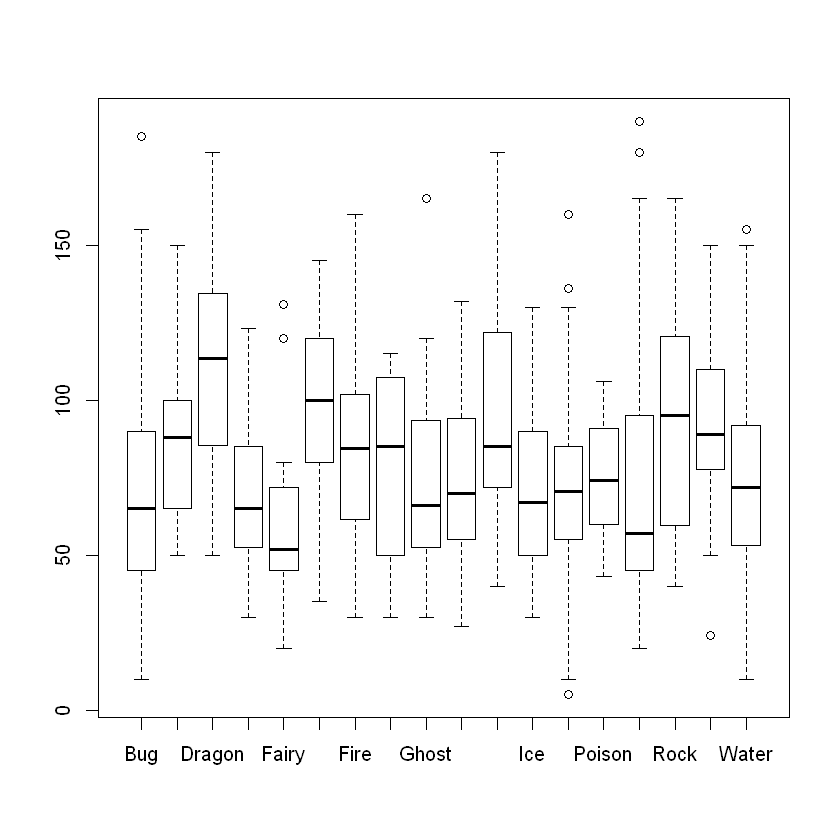

In [23]:
#Caractéristiques de chaque type
boxplot(pokemon$Attack~pokemon$Type.1)
table_cont<-table(pokemon$Type.1,pokemon$Legendary)

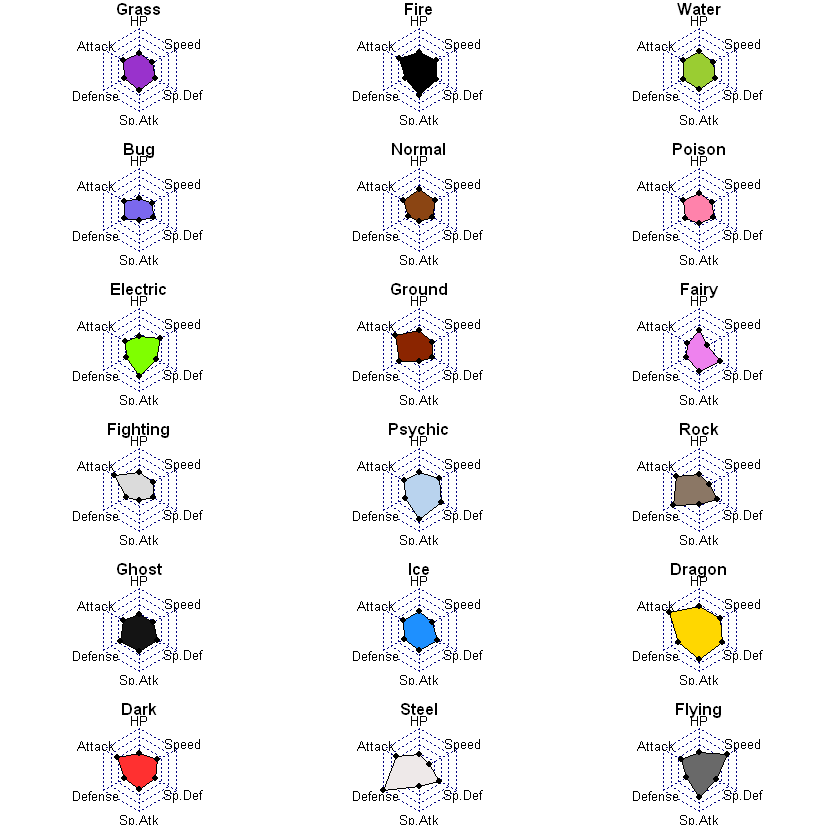

In [201]:
#Stats de chaque type de pokemon
library(fmsb)

Stats_type<-matrix(ncol=6,nrow=18)
names<-as.matrix(dimnames(pokemon)[2])

for (i in 1:length(Type))
{
  Stats_type[i,1]<-mean(pokemon$HP[pokemon$Type.1==Type[i]])
  Stats_type[i,2]<-mean(pokemon$Attack[pokemon$Type.1==Type[i]])
  Stats_type[i,3]<-mean(pokemon$Defense[pokemon$Type.1==Type[i]])
  Stats_type[i,4]<-mean(pokemon$Sp..Atk[pokemon$Type.1==Type[i]])
  Stats_type[i,5]<-mean(pokemon$Sp..Def[pokemon$Type.1==Type[i]])
  Stats_type[i,6]<-mean(pokemon$Speed[pokemon$Type.1==Type[i]])
}

par(mfrow=c(6,3))
par(mar=c(1,1,1,1))
dimnames(Stats_type)<-list(Type,c("HP","Attack","Defense","Sp.Atk","Sp.Def","Speed"))
Data<-data.frame(Stats_type)
for (i in 1:18)
{
    radarchart(rbind(max(Stats_type),min(Stats_type),Data[i,1:6]),pfcol=Color_type[i],title=Type[i])
}


#Dragon semble être le type le plus puissant et bug le plus faible
#Penser à enlever les légendaires

In [154]:
#Etude de la correlation
cor(pokemon.num)

,HP,Attack,Defense,Sp..Atk,Sp..Def
HP,1.0000000,0.4223860,0.2396223,0.3623799,0.3787181
Attack,0.4223860,1.0000000,0.4386871,0.3963618,0.2639896
Defense,0.2396223,0.4386871,1.0000000,0.2235486,0.5107466
Sp..Atk,0.3623799,0.3963618,0.2235486,1.0000000,0.5061214
Sp..Def,0.3787181,0.2639896,0.5107466,0.5061214,1.0000000


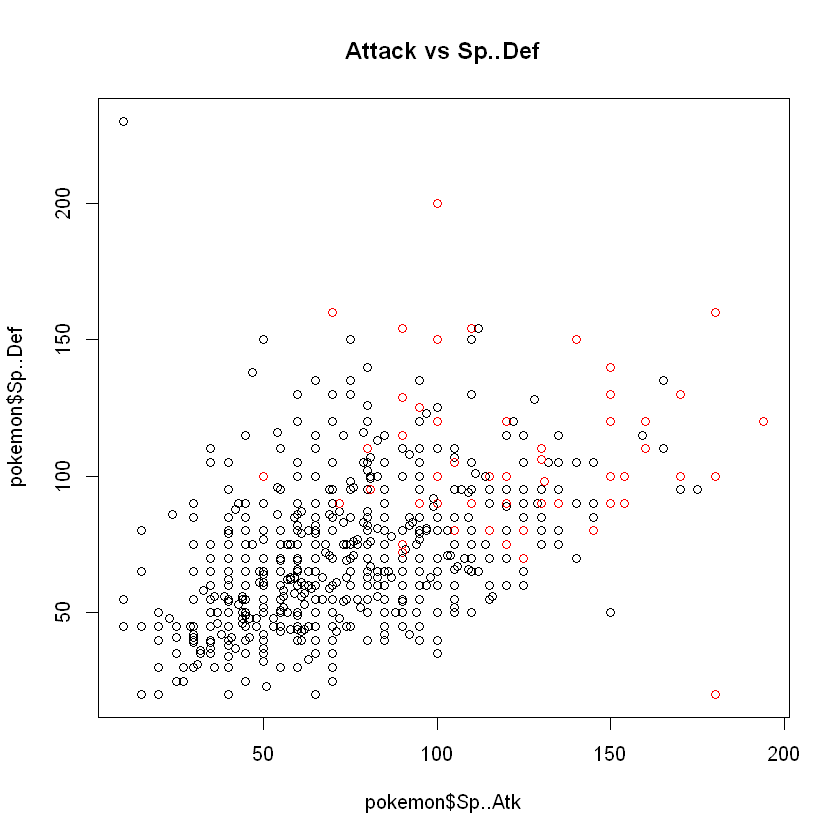

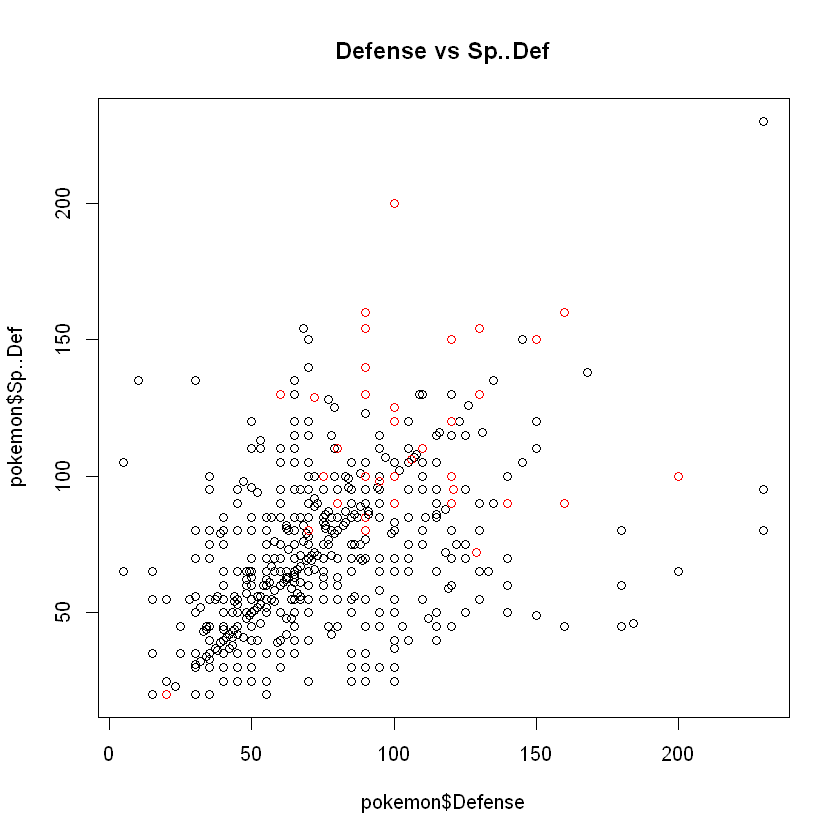

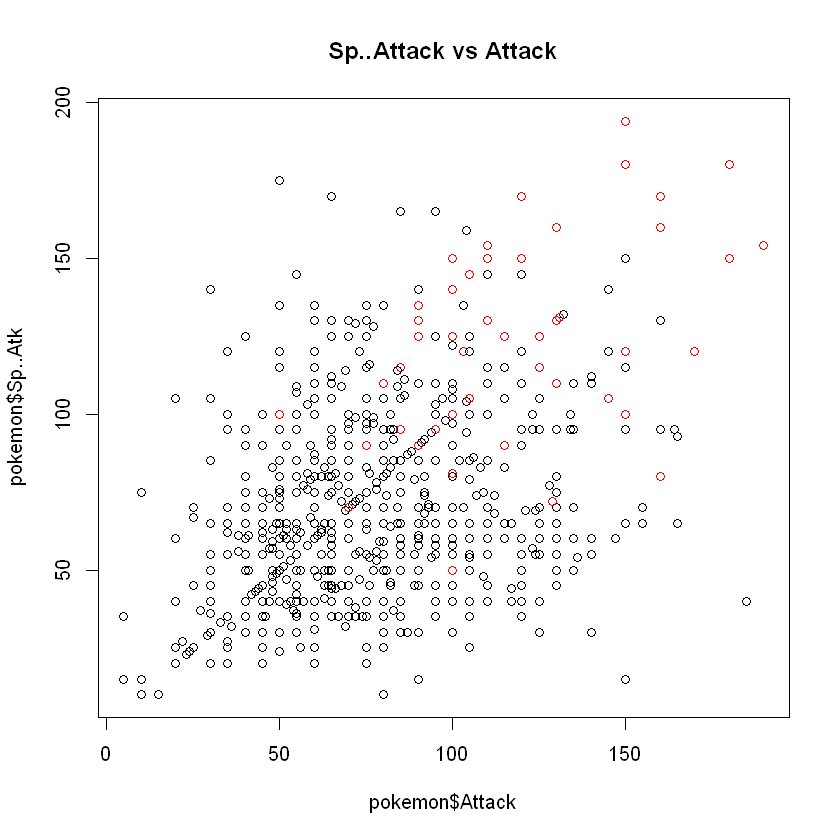

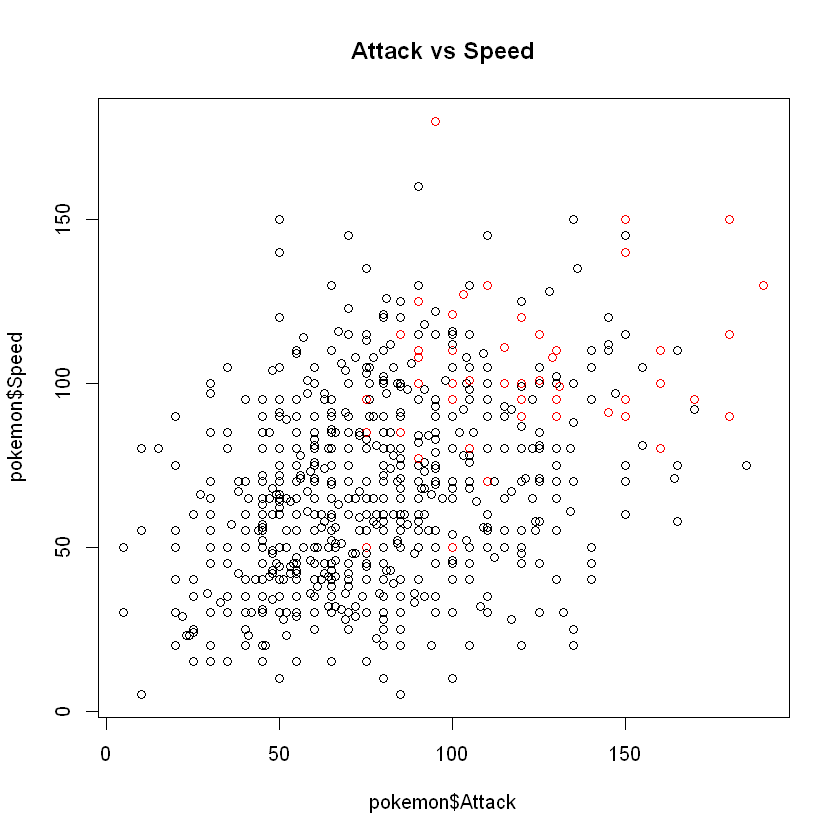

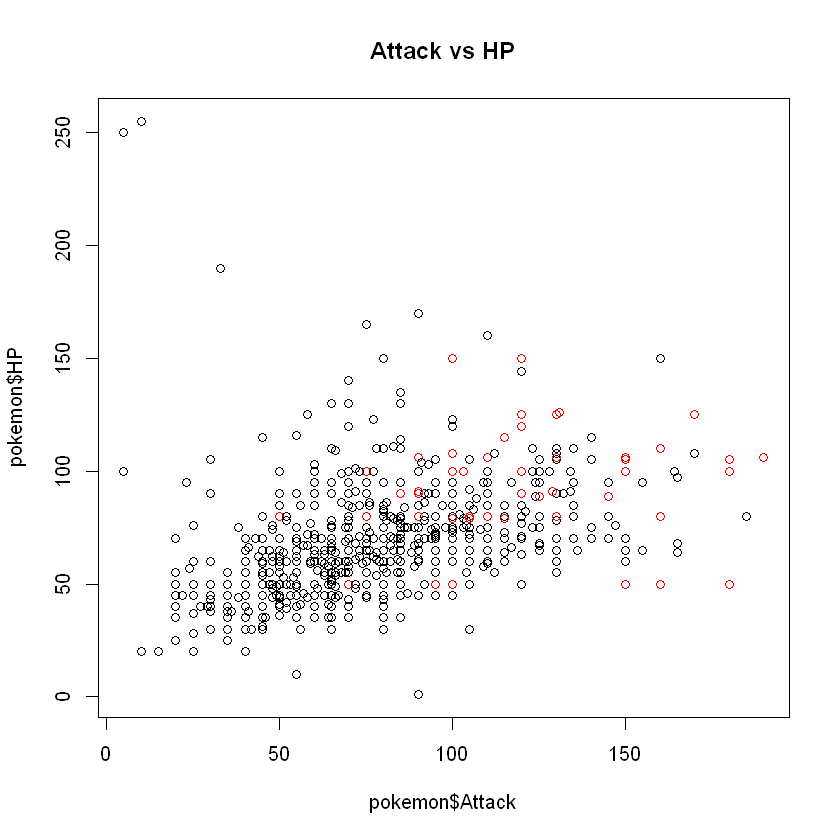

In [4]:
#Pokemon Légendaires (caractéristiques)
plot(pokemon$Sp..Atk,pokemon$Sp..Def,col=as.factor(pokemon$Legendary),main ="Attack vs Sp..Def")
plot(pokemon$Defense,pokemon$Sp..Def,col=as.factor(pokemon$Legendary),main ="Defense vs Sp..Def")
plot(pokemon$Attack,pokemon$Sp..Atk,col=as.factor(pokemon$Legendary),main ="Sp..Attack vs Attack")
plot(pokemon$Attack,pokemon$Speed,col=as.factor(pokemon$Legendary),main ="Attack vs Speed")
plot(pokemon$Attack,pokemon$HP,col=as.factor(pokemon$Legendary),main ="Attack vs HP")


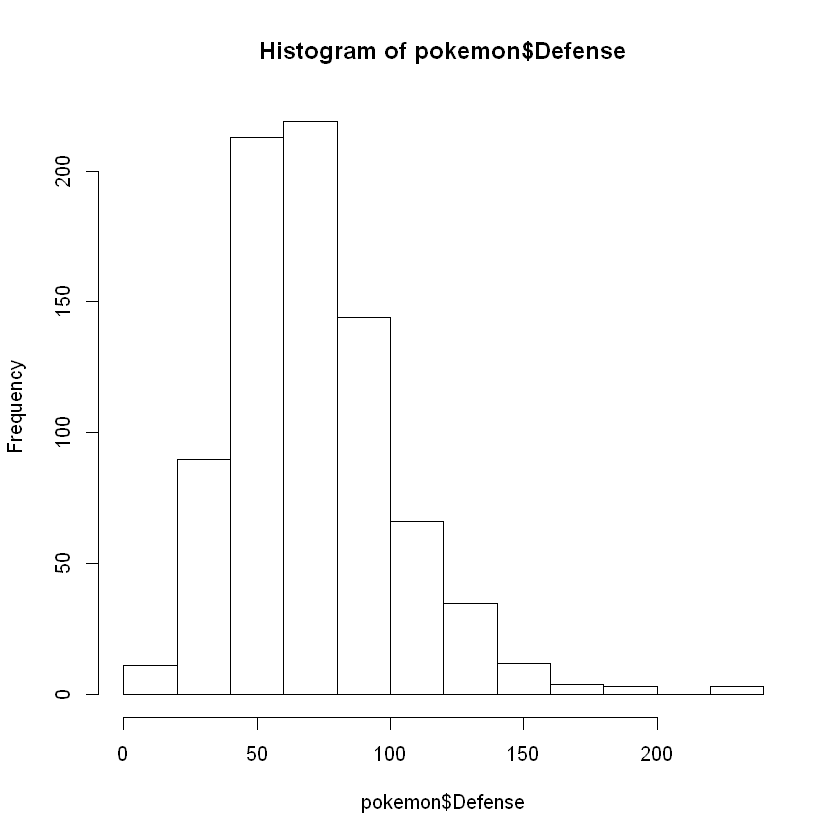

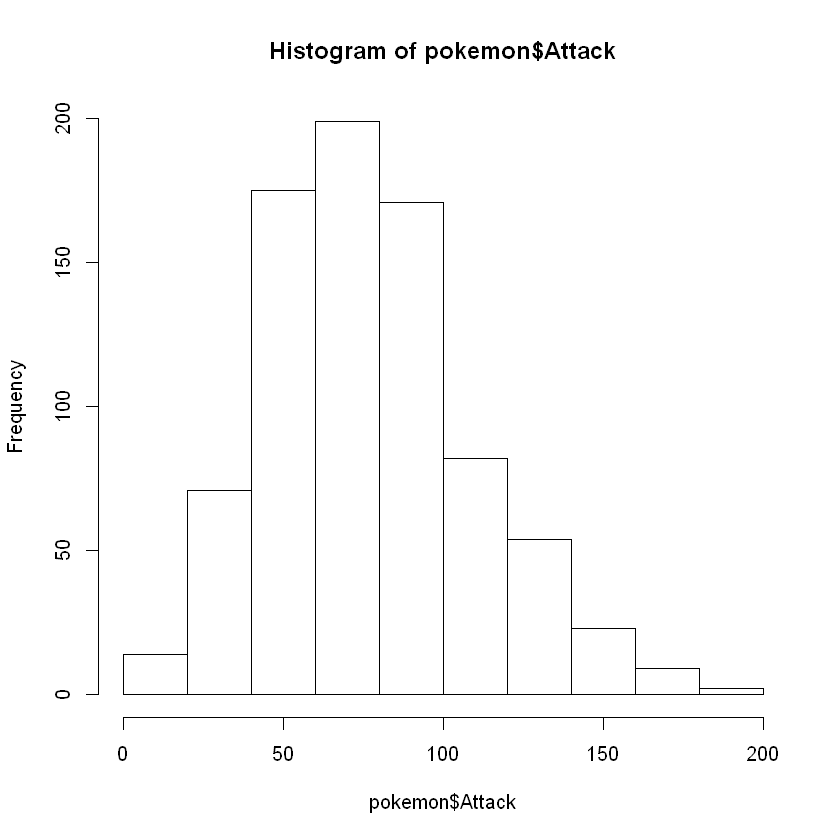

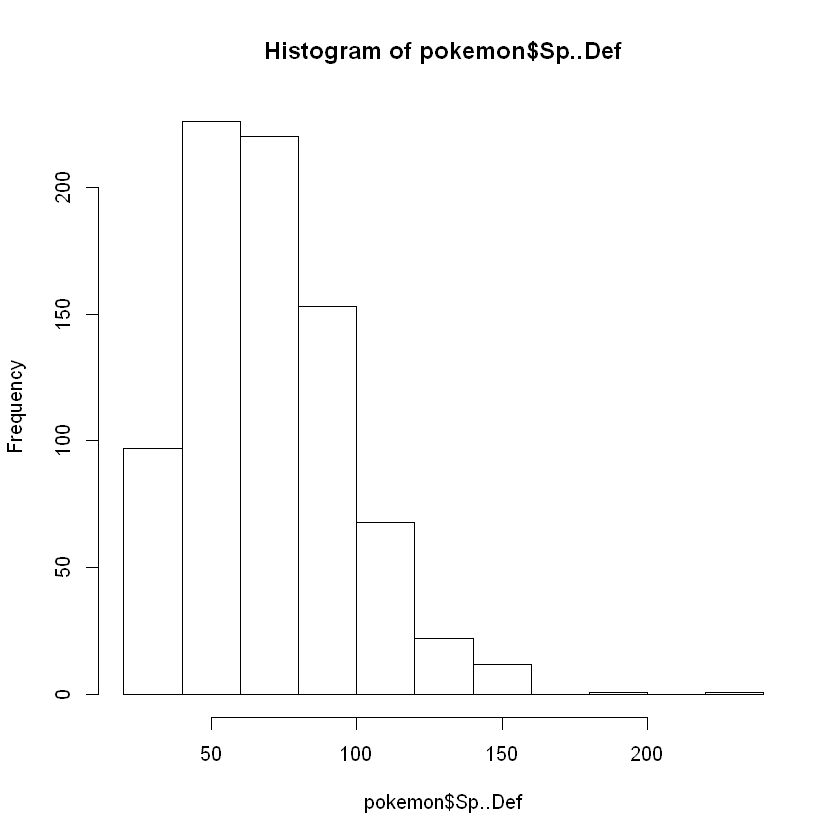

In [192]:
hist(pokemon$Defense)
hist(pokemon$Attack)
hist(pokemon$Sp..Def)

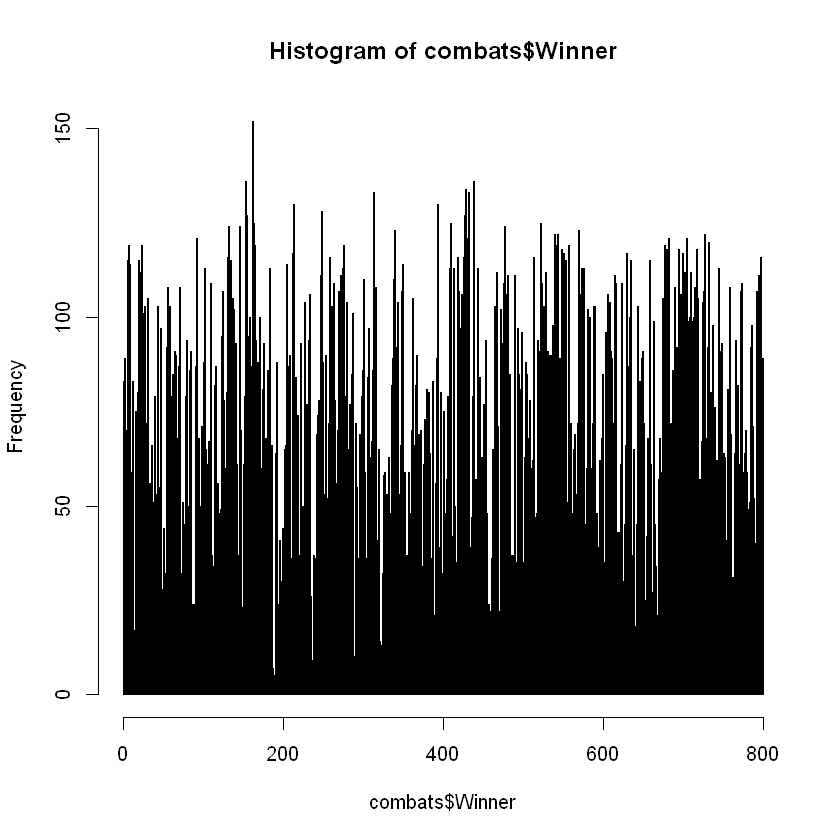

In [7]:
#Histogramme des winners
hist(combats$Winner,breaks=pokemon$X.)


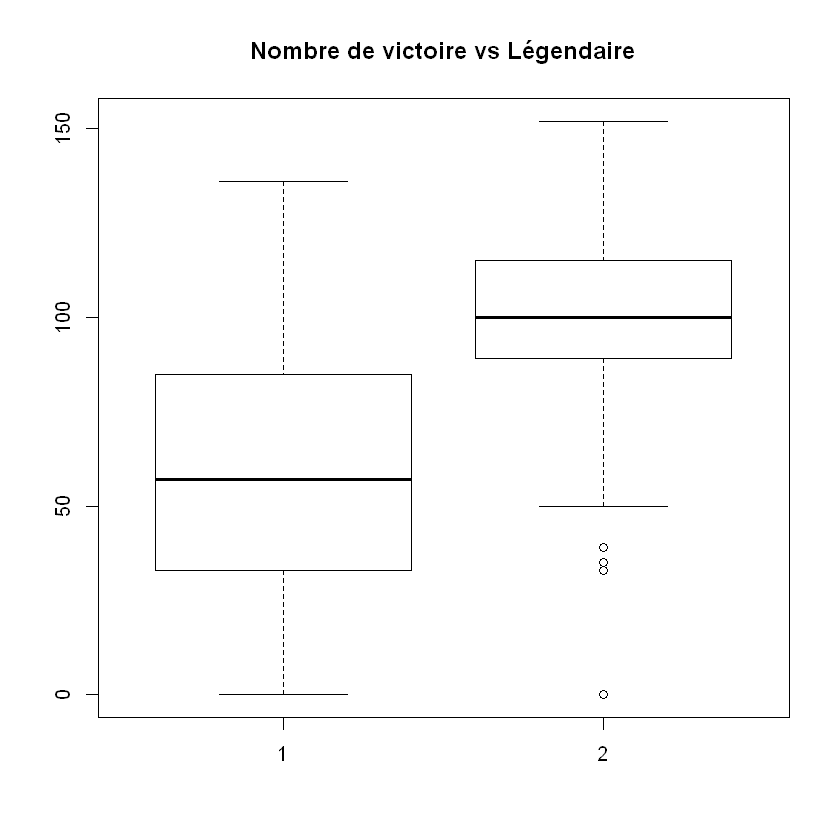

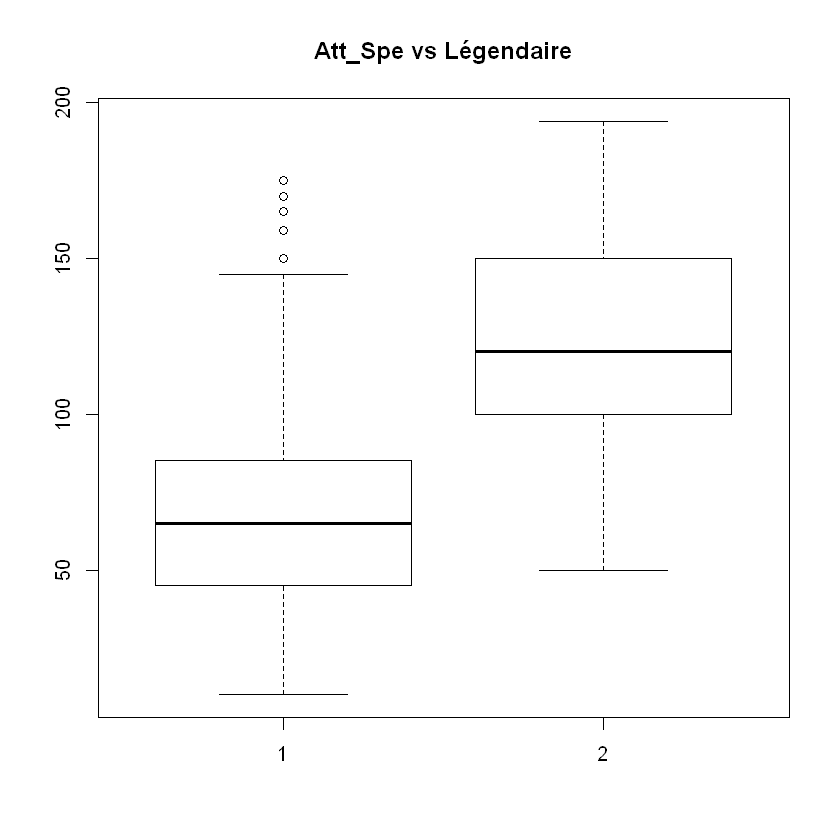

In [207]:
#Nombre de victores en fonctions du caractère "Legendary"
nb_victoire<-c()
nb_match<-c()
for (i in 1:length(pokemon$X.))
{
  nb_match[i]<-length(combats$First_pokemon[combats$First_pokemon==i])+length(combats$Second_pokemon[combats$Second_pokemon==i])
  nb_victoire[i]<- length(combats$Winner[combats$Winner==i])
}
boxplot(nb_victoire~pokemon$Legendary,main= "Nombre de victoire vs Légendaire")
boxplot(pokemon$Sp..Atk~pokemon$Legendary,main= "Att_Spe vs Légendaire")


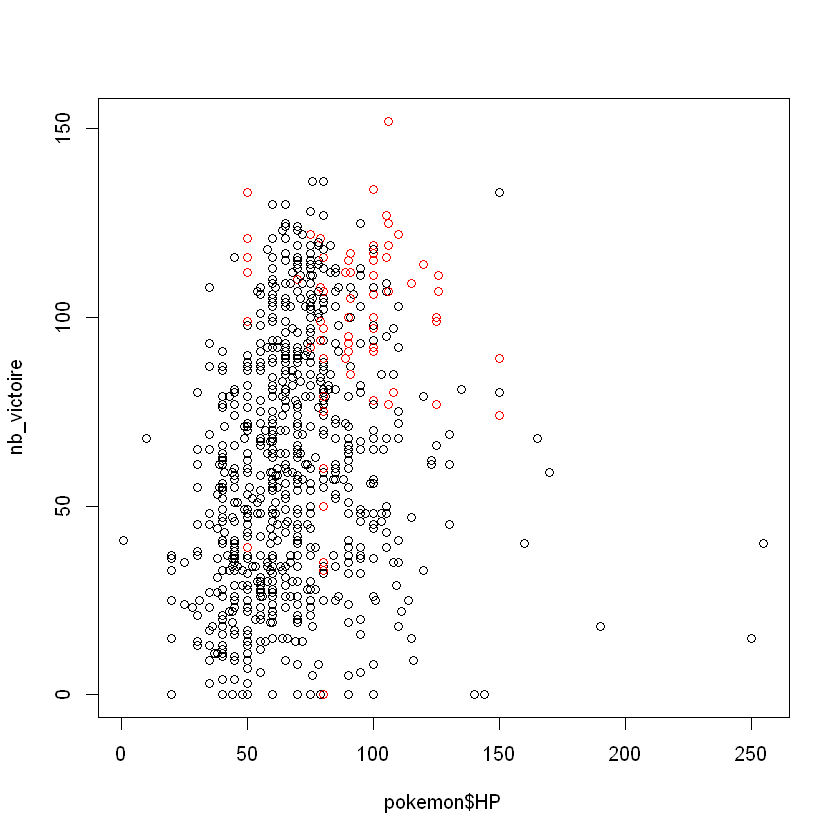

In [25]:
plot(pokemon$HP,nb_victoire,col=as.factor(pokemon$Legendary))

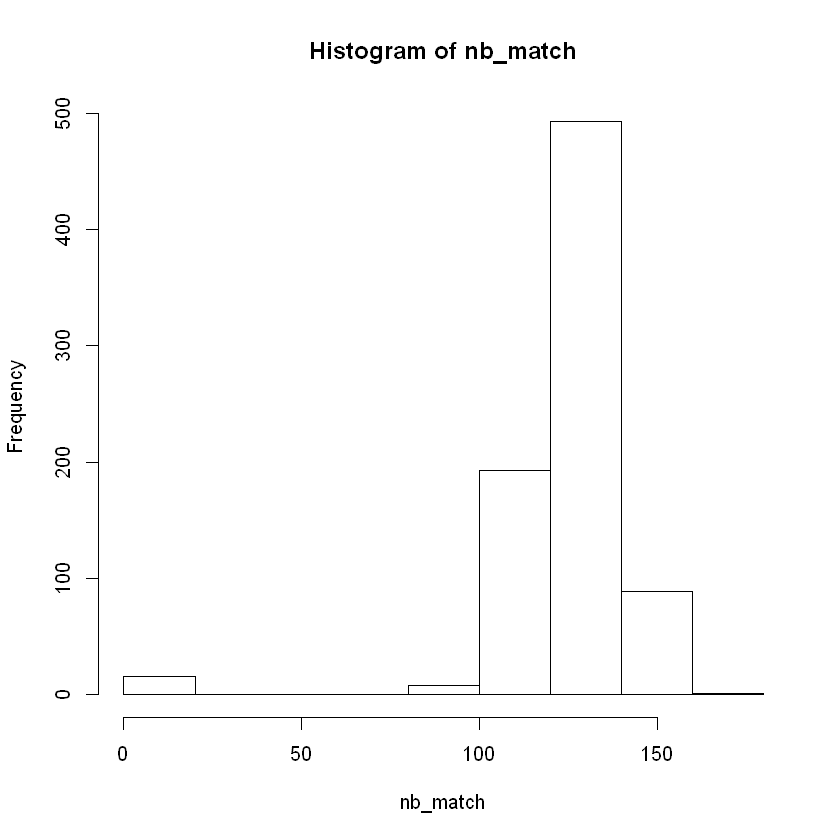

In [10]:
hist(nb_match)

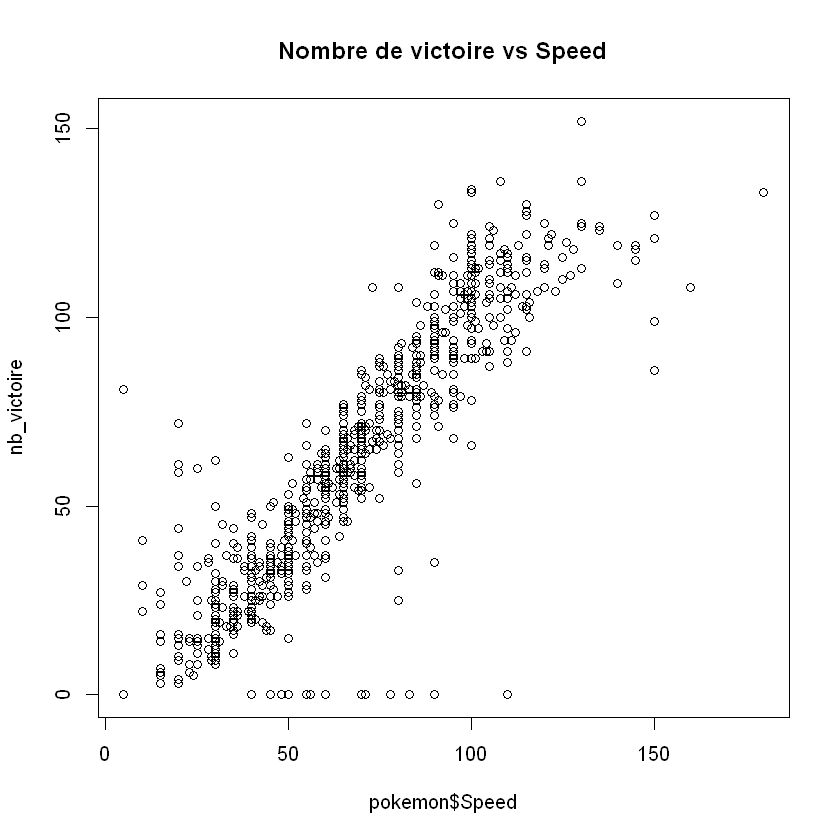

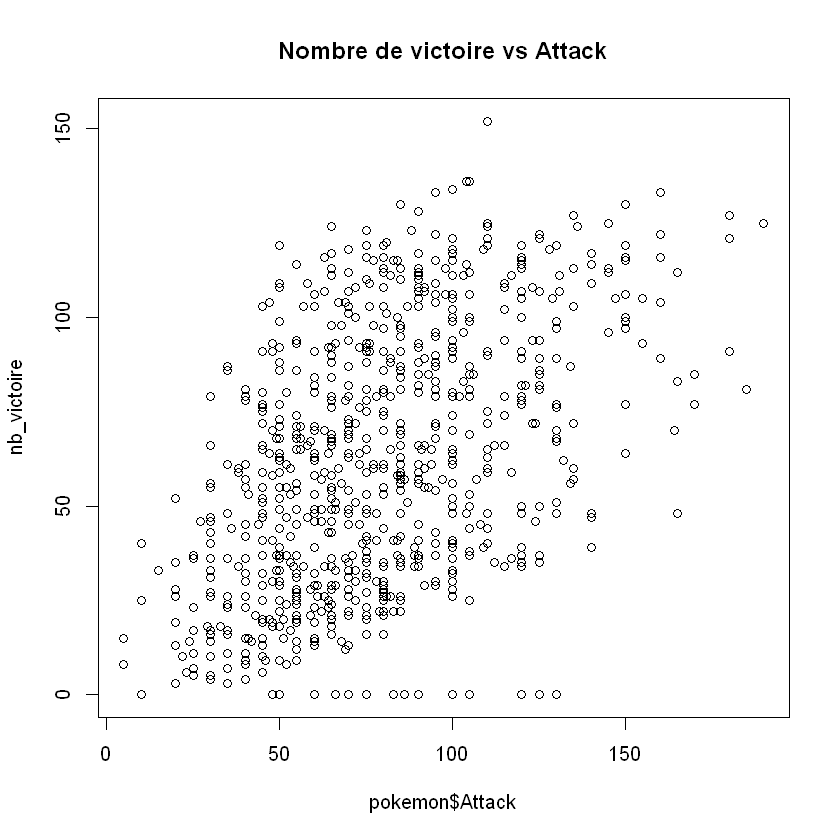

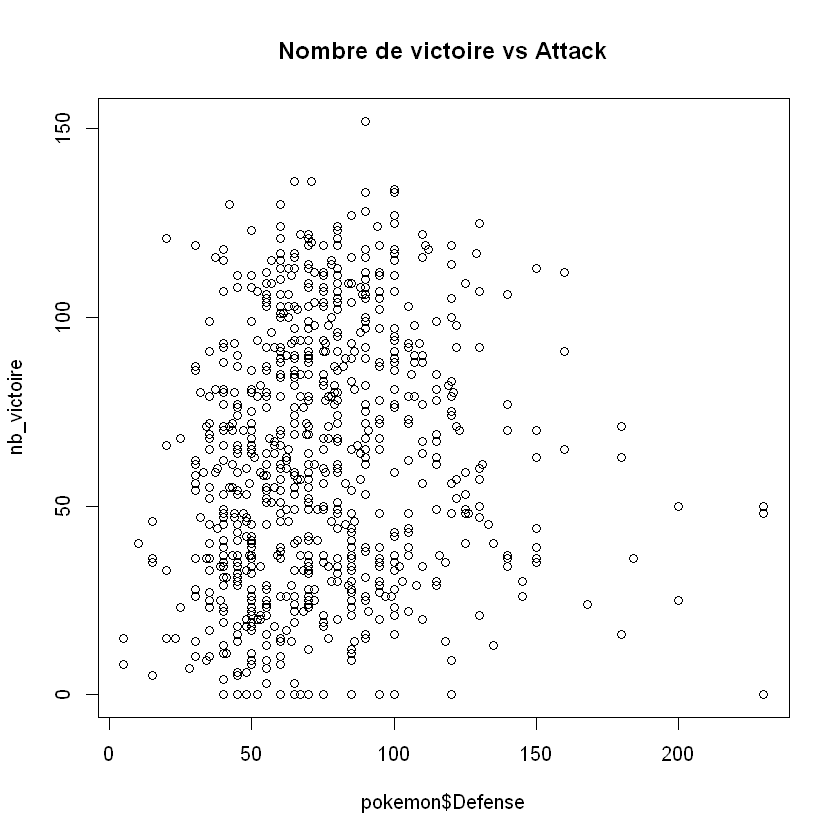

In [22]:
#Nombre de victores en fonctions du caractère "Speed"
nb_victoire<-c()
nb_match<-c()
for (i in 1:length(pokemon$X.))
{
  nb_match[i]<-length(combats$First_pokemon[combats$First_pokemon==i])+length(combats$Second_pokemon[combats$Second_pokemon==i])
  nb_victoire[i]<- length(combats$Winner[combats$Winner==i])
}
data<-cbind()
plot(pokemon$Speed,nb_victoire,main= "Nombre de victoire vs Speed")
plot(pokemon$Attack,nb_victoire,main= "Nombre de victoire vs Attack")
plot(pokemon$Defense,nb_victoire,main= "Nombre de victoire vs Attack")
plot(pokemon$,nb_victoire,main= "Nombre de victoire vs Attack")

In [26]:
Type_Combat<-c()
Type_Combat2<-c()
Type_Gagnant<-c()
for (i in 1:length(combats$First_pokemon))
{
  Type_Combat[c(i)]<- pokemon$Type.1[pokemon$X.==combats$First_pokemon[i]]
  Type_Combat2[c(i)]<- pokemon$Type.1[pokemon$X.==combats$Second_pokemon[i]]
  Type_Gagnant[c(i)]<-pokemon$Type.1[pokemon$X.==combats$Winner[i]]
  
  
}
Type_Analysis<-cbind(Type_Combat,Type_Combat2,Type_Gagnant)

In [27]:
HP_Combat<-c()
HP_Combat2<-c()
HP_Gagnant<-c()
for (i in 1:length(combats$First_pokemon))
{
  HP_Combat[c(i)]<- pokemon$HP[pokemon$X.==combats$First_pokemon[i]]
  HP_Combat2[c(i)]<- pokemon$HP[pokemon$X.==combats$Second_pokemon[i]]
  HP_Gagnant[c(i)]<-pokemon$HP[pokemon$X.==combats$Winner[i]]
}
Winner_Analysis<-cbind(HP_Combat,HP_Combat2,HP_Gagnant)
ratio = length(HP_Gagnant[HP_Gagnant>=HP_Combat&HP_Gagnant>=HP_Combat2])/length(HP_Gagnant)
print(ratio)

[1] 0.62396



Loadings:
        Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
HP      -0.325 -0.124  0.206  0.860 -0.310
Attack  -0.509  0.238  0.717 -0.200  0.361
Defense -0.450  0.664 -0.353 -0.154 -0.457
Sp..Atk -0.503 -0.695        -0.391 -0.327
Sp..Def -0.424        -0.560  0.208  0.677

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
SS loadings       1.0    1.0    1.0    1.0    1.0
Proportion Var    0.2    0.2    0.2    0.2    0.2
Cumulative Var    0.2    0.4    0.6    0.8    1.0

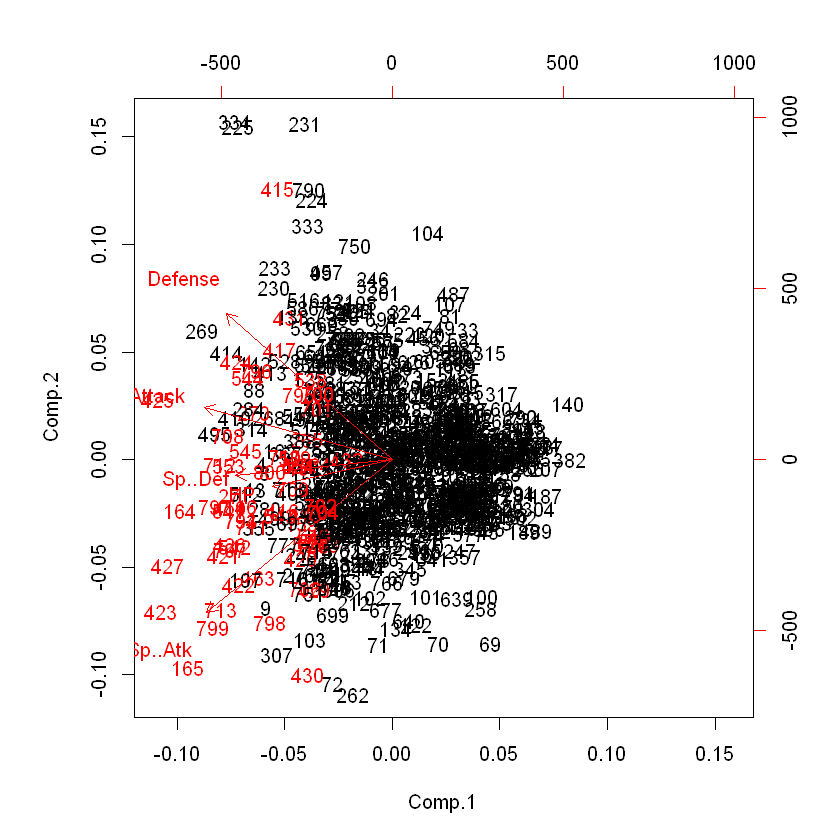

In [8]:
#ACP
pokemon.num<-pokemon[c(5,6,7,8,9)]
ACP<-princomp(pokemon.num)

ACP$loadings

a <- list(as.vector(as.numeric(pokemon$Legendary)),"red")
class(a) <- append(class(a),"myclass")
'[.myclass' <- function(x,i) x[[i]]

biplot(princomp(pokemon.num), col = a,choices=c(1,2)) 



Call:
lm(formula = pokemon$Sp..Atk ~ pokemon$Sp..Def)

Residuals:
     Min       1Q   Median       3Q      Max 
-156.906  -17.883   -5.663   16.288  138.068 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      30.0296     2.7676   10.85   <2e-16 ***
pokemon$Sp..Def   0.5951     0.0359   16.58   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 28.24 on 798 degrees of freedom
Multiple R-squared:  0.2562,	Adjusted R-squared:  0.2552 
F-statistic: 274.8 on 1 and 798 DF,  p-value: < 2.2e-16


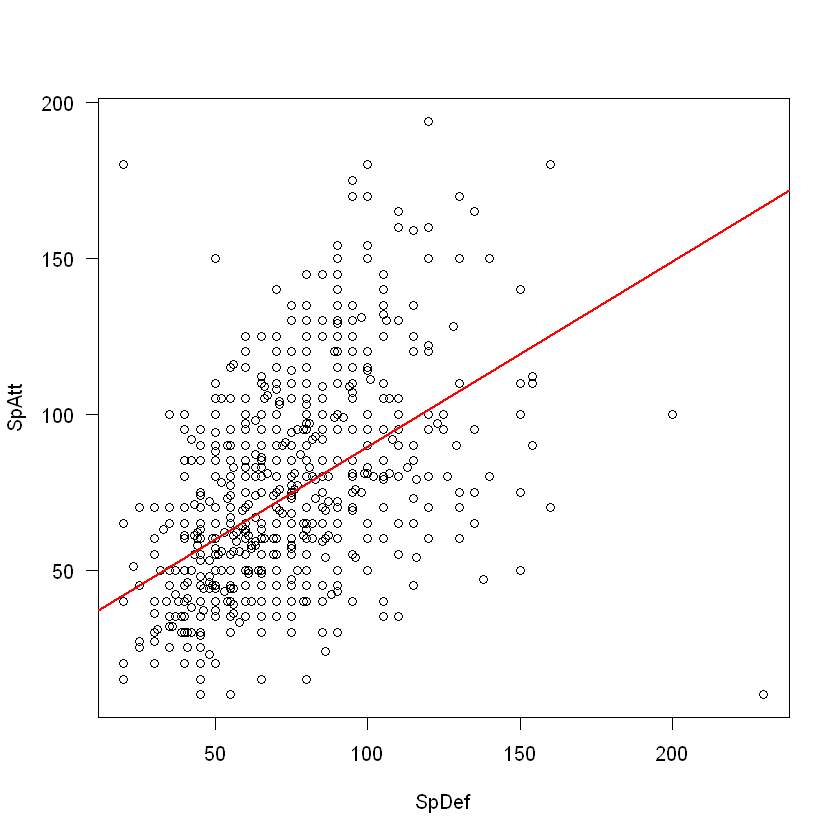

In [18]:
mod.sr.a<-lm(pokemon$Sp..Atk~pokemon$Sp..Def)
summary(mod.sr.a)
plot(pokemon$Sp..Def,pokemon$Sp..Atk,las=1,xlab="SpDef",ylab="SpAtt")
abline(mod.sr.a,lwd=2,col="red")

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 800 individuals, described by 5 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

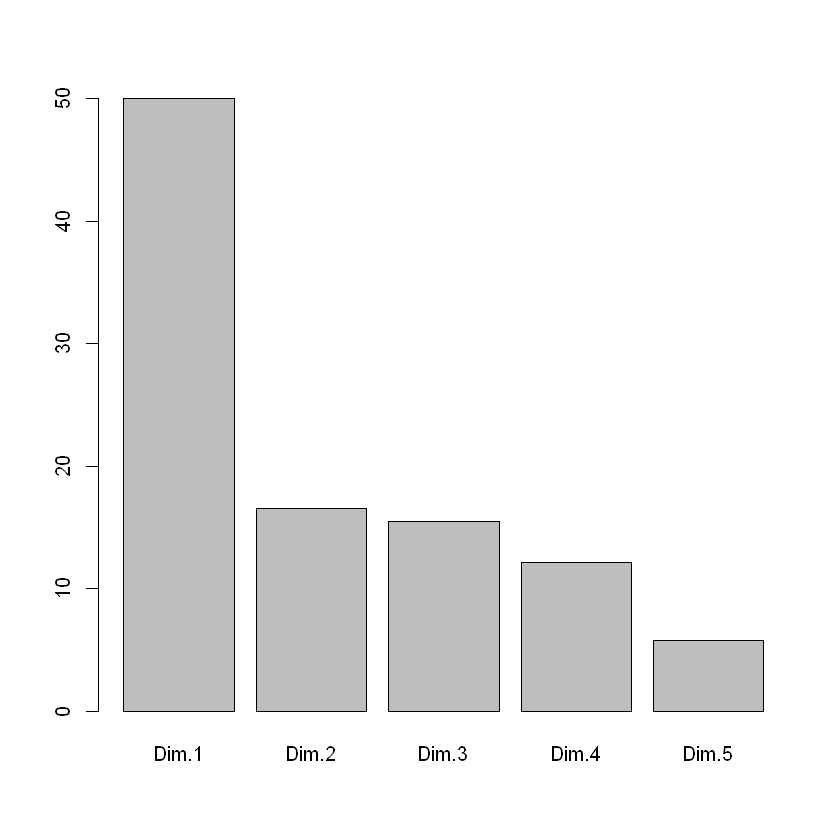

In [209]:
library(factoextra)
library(magrittr) # for pipe %>%
library(dplyr)  
library(FactoMineR)
res<- PCA(pokemon.num, graph = FALSE)
print(res)
eig.val <- get_eigenvalue(res)
barplot(eig.val[,2]) #Contribution de chaque variables


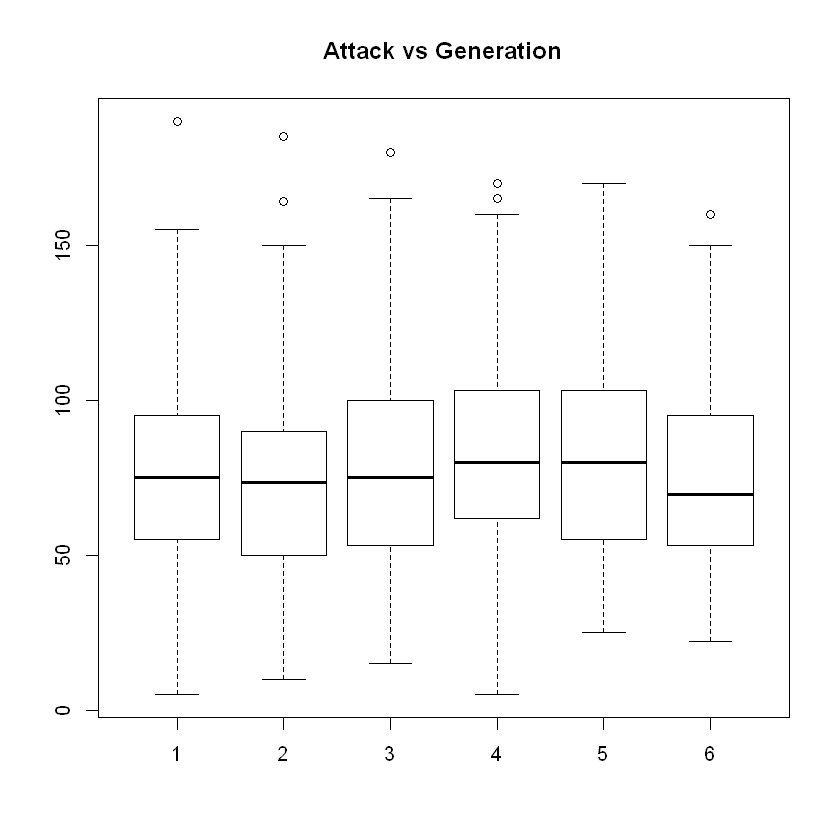

In [196]:
#Etude par génération
nb_gen <-length(unique(pokemon$Generation))
Corr_Gen <-array(0, c(5,5,nb_gen))

for (i in 1:nb_gen)
{
    ind<−which(pokemon$Generation == i)
   
    Corr_Gen[,,i]<-cor(pokemon.num[ind,]) #Correlation pour chaque génération
       
    
}
ind<−which(pokemon$Generation == 1)
boxplot(pokemon$Attack~pokemon$Generation,main ="Attack vs Generation")

In [198]:
#Etude par type
nb_type <-length(unique(pokemon$Type.1))
ind <-c()

for (i in 1:nb_type)
{
    ind<−which(pokemon$Type.1 == Type[i])
   
    pokemon.num[ind,] #Correlation pour chaque génération
       
    
}




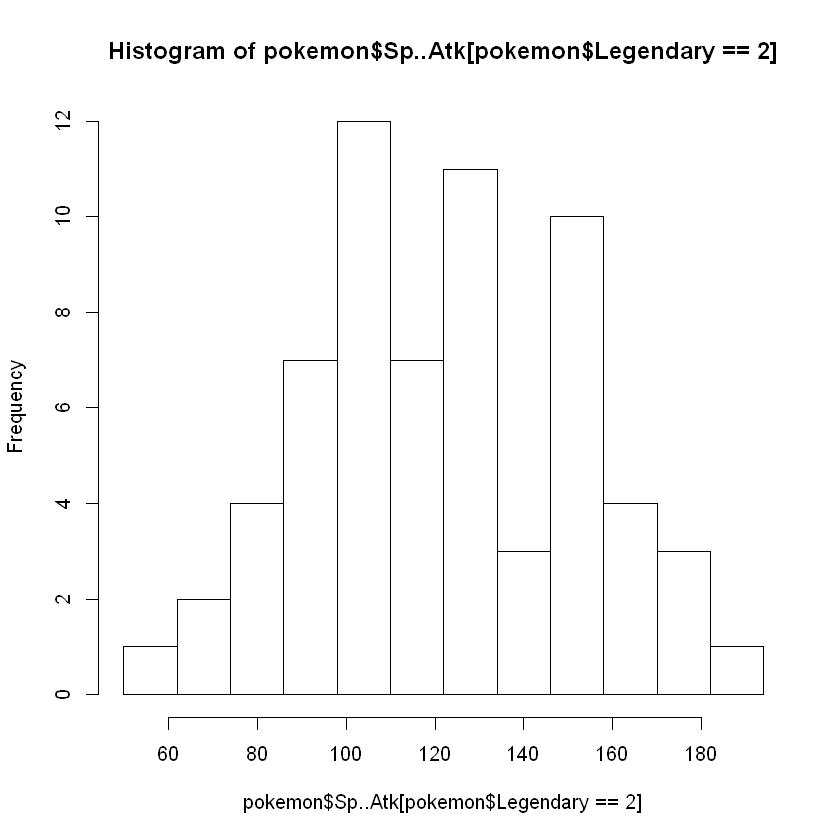

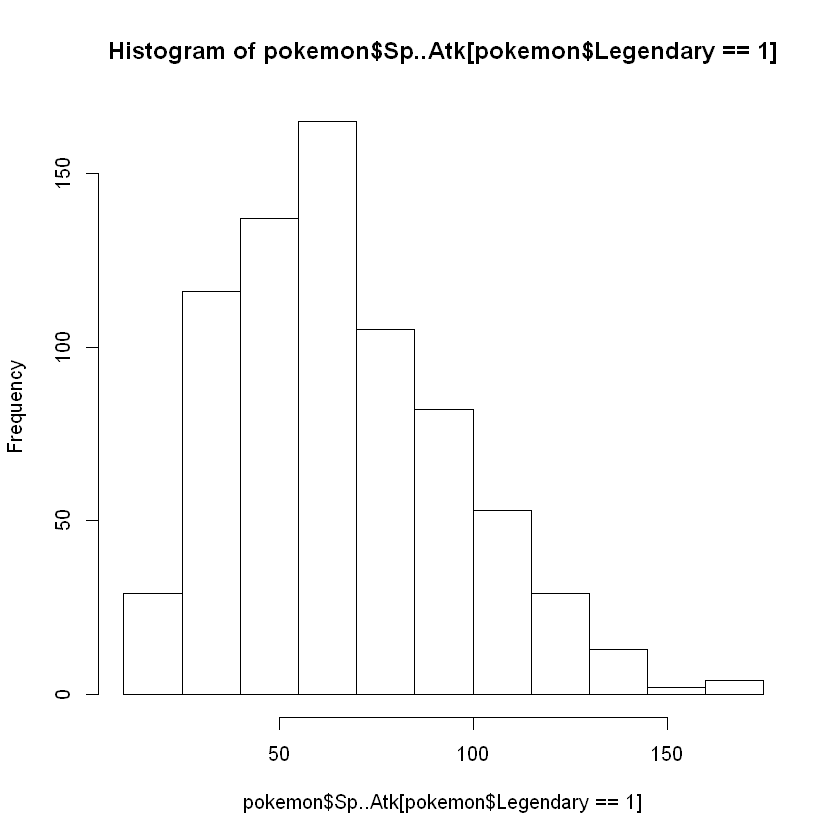

In [239]:
hist(pokemon$Sp..Atk[pokemon$Legendary==2],breaks =seq(from=min(pokemon$Sp..Atk[pokemon$Legendary==2]),to=max(pokemon$Sp..Atk[pokemon$Legendary==2]),by=12))
hist(pokemon$Sp..Atk[pokemon$Legendary==1],breaks =seq(from=min(pokemon$Sp..Atk[pokemon$Legendary==1]),to=max(pokemon$Sp..Atk[pokemon$Legendary==1]),by=15))